In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby(['source']).sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,053,154","4,051,248"


# Total Persons - Pierce County

In [5]:
_df = df.rename(columns={'person_county':'County'}).groupby(['County','source'])['psexpfac'].sum()
_df[_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot(index='County', columns='source', values='psexpfac')

source,model,survey
County,,
Pierce,"851,709","850,387"


# Total Persons - Other Counties

In [6]:
_df[~_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot_table(index='County', columns='source', values='psexpfac', margins=True, aggfunc=sum).\
    drop('All',axis=1)

source,model,survey
County,,
King,"2,149,234","2,161,738"
Kitsap,"257,159","249,302"
Snohomish,"795,052","789,822"
All,"3,201,445","3,200,862"


# Total Households

In [7]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,605,263","1,656,512"


## Pierce County

In [8]:
df = load_data('auto_ownership')
_df = df.rename(columns={'hh_county':'County'}).groupby(['County','source'])['hhexpfac'].sum()
_df[_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot(index='County', columns='source', values='hhexpfac')

source,model,survey
County,,
Pierce,"323,804","339,240"


## Other Counties

In [9]:
_df = df.rename(columns={'hh_county':'County'}).groupby(['County','source'])['hhexpfac'].sum()
_df[~_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot_table(index='County', columns='source', values='hhexpfac', margins=True, aggfunc=sum).\
    drop('All',axis=1)

source,model,survey
County,,
King,"884,650","915,410"
Kitsap,"101,859","99,071"
Snohomish,"294,950","302,792"
All,"1,281,459","1,317,272"


# Total Trips

In [10]:
df = load_data('trip_total')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"16,248,527","15,766,214"


## Pierce County

In [11]:
_df = df.rename(columns={'person_county':'County'}).groupby(['County','source'])['trexpfac'].sum()
_df[_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot(index='County', columns='source', values='trexpfac')

source,model,survey
County,,
Pierce,"3,201,733","2,998,553"


## Other Counties

In [12]:
_df = df.rename(columns={'person_county':'County'}).groupby(['County','source'])['trexpfac'].sum()
_df[~_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot_table(index='County', columns='source', values='trexpfac', margins=True, aggfunc=sum).\
    drop('All',axis=1)

source,model,survey
County,,
King,"8,946,396","8,813,594"
Kitsap,"989,673","974,117"
Snohomish,"3,110,725","2,979,950"
All,"13,046,794","12,767,661"


# Total Tours

In [13]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"6,405,656","6,807,631"


## Pierce County

In [14]:
_df = df.rename(columns={'person_county':'County'}).groupby(['County','source'])['toexpfac'].sum()
_df[_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot(index='County', columns='source', values='toexpfac')

source,model,survey
County,,
Pierce,"1,266,566","1,334,376"


## Other Counties

In [15]:
_df = df.rename(columns={'person_county':'County'}).groupby(['County','source'])['toexpfac'].sum()
_df[~_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot_table(index='County', columns='source', values='toexpfac', margins=True, aggfunc=sum).\
    drop('All',axis=1)

source,model,survey
County,,
King,"3,524,395","3,663,281"
Kitsap,"390,122","502,309"
Snohomish,"1,224,573","1,307,664"
All,"5,139,090","5,473,255"


## Average Household Size

In [16]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.52
survey,2.45


## Pierce County

In [17]:
for county, df_county in df.groupby('person_county'):
    if county=='Pierce':
        print(county + ' County')
        print(pd.DataFrame(
        df_county.groupby('source').apply(
            lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
            columns=['avg_hh_size']))

Pierce County
        avg_hh_size
source             
model          2.63
survey         2.51


## Other Counties

In [18]:
for county, df_county in df.groupby('person_county'):
    if county!='Pierce':
        print(county + ' County')
        print(pd.DataFrame(
        df_county.groupby('source').apply(
            lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
            columns=['avg_hh_size']))

King County
        avg_hh_size
source             
model          2.43
survey         2.36
Kitsap County
        avg_hh_size
source             
model          2.52
survey         2.52
Snohomish County
        avg_hh_size
source             
model          2.70
survey         2.61


## Average Trips per Person

In [19]:
df_person = load_data('person_type')
df_person = df_person.groupby(['person_county', 'source'], as_index=False)['psexpfac'].sum()
df = load_data('trip_total')
df = df.join(df_person.set_index(['person_county', 'source']), on=['person_county', 'source'], how='left')
for county, df_county in df.groupby('person_county'):
    if county=='Pierce':
        print(county + ' County')
        print(df_county.assign(tripsperprsn= lambda _df: (_df.trexpfac*1.0)/(_df.psexpfac*1.0)).\
              groupby(['mode', 'source'], as_index=False)['tripsperprsn'].sum().\
              pivot_table(index=['mode'], columns='source', values='tripsperprsn'))

Pierce County
source      model  survey
mode                     
Bike         0.06    0.01
HOV2         0.93    0.86
HOV3+        0.65    0.56
SOV          1.56    1.67
School Bus   0.08    0.07
TNC          0.03    0.00
Transit      0.04    0.07
Walk         0.40    0.24


In [20]:
for county, df_county in df.groupby('person_county'):
    if county!='Pierce':
        print('\n' + county + ' County')
        print(df_county.assign(tripsperprsn= lambda _df: (_df.trexpfac*1.0)/(_df.psexpfac*1.0)).\
              groupby(['mode', 'source'], as_index=False)['tripsperprsn'].sum().\
              pivot_table(index=['mode'], columns='source', values='tripsperprsn'))


King County
source      model  survey
mode                     
Bike         0.07    0.06
HOV2         0.91    0.88
HOV3+        0.62    0.60
SOV          1.67    1.59
School Bus   0.08    0.05
TNC          0.05    0.02
Transit      0.16    0.21
Walk         0.60    0.63

Kitsap County
source      model  survey
mode                     
Bike         0.05    0.00
HOV2         0.93    1.10
HOV3+        0.61    0.62
SOV          1.63    1.91
School Bus   0.07    0.02
TNC          0.03    0.00
Transit      0.07    0.11
Walk         0.46    0.11

Snohomish County
source      model  survey
mode                     
Bike         0.05    0.01
HOV2         0.96    0.88
HOV3+        0.69    0.73
SOV          1.72    1.71
School Bus   0.09    0.06
TNC          0.03    0.01
Transit      0.05    0.06
Walk         0.32    0.30


## Average Distance to Work

In [21]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean().pivot_table(index=['mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source        model survey    model survey    model survey
mode                                                      
Bike           0.00   0.00     5.35   3.26    35.67  19.56
HOV2           2.37   0.45     9.94   7.19    23.13  18.29
HOV3+          2.47   1.46    10.16  11.30    23.56  23.80
SOV            2.14   0.18     9.92   9.04    23.24  20.36
School Bus     0.67   0.00     3.37   3.91    10.79  11.61
TNC            0.51   0.01     2.43   9.70    10.35  20.37
Transit        2.03   4.75    21.27  14.47    60.60 154.27
Walk           0.00   0.00     0.71   1.34    14.30  26.96

## Pierce County

In [22]:
_df = df[df['dpurp'] == 'Work'].rename(columns={'person_county':'County'}).groupby(['County','mode','source']).mean()
_df[_df.index.get_level_values(0).isin(['Pierce'])].pivot_table(index=['County','mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source               model survey    model survey    model survey
County mode                                                      
Pierce Bike           0.00   0.00     5.45   3.51    36.30  21.08
       HOV2           2.28   0.10    10.82   6.92    25.38  16.64
       HOV3+          2.35   0.31    11.11   5.43    25.91  15.21
       SOV            2.26   0.15    10.76  10.02    25.95  22.50
       School Bus     0.89    NaN     4.46    NaN    13.79    NaN
       TNC            0.54   0.00     2.59  29.08    10.71  39.96
       Transit        2.21   5.01    25.72  25.02    79.77  65.68
       Walk           0.00   0.00     0.76   0.61    15.15  12.24

## Other Counties

In [23]:
_df[~_df.index.get_level_values(0).isin(['Pierce'])].pivot_table(index=['County','mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source                  model survey    model survey    model survey
County    mode                                                      
King      Bike           0.00   0.00     4.75   3.49    31.67  20.97
          HOV2           1.77   0.17     8.28   6.60    20.66  17.14
          HOV3+          1.83   0.27     8.49   7.49    20.88  17.76
          SOV            1.76   0.14     8.47   7.90    21.49  19.18
          School Bus     0.78   0.00     3.89   3.91    11.31  11.61
          TNC            0.49   0.05     2.33   3.91    10.97  15.67
          Transit        1.17   2.80    11.78   6.16    39.61  23.12
          Walk           0.00   0.00     0.67   0.76    13.46  15.20
Kitsap    Bike           0.00   0.00     4.87   3.88    32.47  23.33
          HOV2           2.98   1.53     9.08   7.00    21.29  18.54
          HOV3+          3.28   5.27     9.06  23.25    21.81  43.63
          SOV            2.13   0.39     8.61   7.84    19.22  17.19
          School Bus     0.41    NaN     2.07    NaN     7.98    NaN
          TNC            0.44   0.00     2.02   1.71     9.15  13.36
          Transit        2.65   5.47    17.98  12.48    82.97 483.81
          Walk           0.00   0.00     0.63   2.93    12.61  58.70
Snohomish Bike           0.00   0.00     6.33   2.14    42.22  12.85
          HOV2           2.42   0.00    11.56   8.25    25.16  20.84
          HOV3+          2.43   0.00    11.98   9.01    25.63  18.59
          SOV            2.40   0.05    11.86  10.41    26.32  22.57
          School Bus     0.61    NaN     3.04    NaN    10.07    NaN
          TNC            0.56   0.00     2.79   4.09    10.59  12.50
          Transit        2.10   5.72    29.60  14.22    40.05  44.45
          Walk           0.00   0.00     0.80   1.08    15.97  21.71

## Average Distance to School

In [24]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean().pivot_table(index=['mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source        model survey    model survey    model survey
mode                                                      
Bike           0.00   0.00     2.88   1.44    19.23   8.64
HOV2           0.68   0.05     3.30   4.07    10.69  12.08
HOV3+          0.72   0.00     3.45   4.71    10.97  12.77
SOV            1.39   0.26     6.45   7.98    16.52  20.94
School Bus     0.65   0.00     3.18   2.72    10.54   9.27
TNC            0.48   0.18     2.35   3.22     9.17  15.08
Transit        0.48   4.21     6.64  10.18    43.28  29.29
Walk           0.00   0.00     1.38   0.84    27.51  16.84

## Pierce County

In [25]:
_df = df[df['dpurp'] == 'School'].rename(columns={'person_county':'County'}).groupby(['County','mode','source']).mean()
_df[_df.index.get_level_values(0).isin(['Pierce'])].pivot_table(index=['County','mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source               model survey    model survey    model survey
County mode                                                      
Pierce Bike           0.00    NaN     2.97    NaN    19.79    NaN
       HOV2           0.67   0.12     3.20   3.51    10.54  11.99
       HOV3+          0.71   0.00     3.35   6.64    10.83  16.90
       SOV            1.39   0.17     6.17   7.05    16.47  19.20
       School Bus     0.64   0.00     3.10   3.30    10.43  10.66
       TNC            0.50    NaN     2.38    NaN     9.15    NaN
       Transit        0.34   4.12     5.10  14.08    40.49  34.27
       Walk           0.00   0.00     1.36   0.99    27.15  20.00

## Other Counties

In [26]:
_df[~_df.index.get_level_values(0).isin(['Pierce'])].pivot_table(index=['County','mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False)

travcost        travdist        travtime       
source                  model survey    model survey    model survey
County    mode                                                      
King      Bike           0.00   0.00     2.54   1.44    16.91   8.64
          HOV2           0.64   0.07     3.18   3.30    10.90  10.92
          HOV3+          0.66   0.01     3.29   3.03    11.16  10.48
          SOV            1.13   0.14     5.61   6.10    15.73  17.37
          School Bus     0.62   0.00     3.08   2.84    10.79   9.56
          TNC            0.47   0.18     2.33   3.22     9.73  15.08
          Transit        0.34   2.75     5.49   3.91    34.40  13.10
          Walk           0.00   0.00     1.32   0.81    26.47  16.25
Kitsap    Bike           0.00    NaN     2.83    NaN    18.87    NaN
          HOV2           0.71   0.00     3.31   3.92    10.23  11.23
          HOV3+          0.77   0.00     3.48   4.12    10.52  10.77
          SOV            1.60   0.74     6.85  11.09    16.46  28.86
          School Bus     0.67   0.00     3.16   2.15    10.05   8.45
          TNC            0.44    NaN     2.16    NaN     8.46    NaN
          Transit        0.62    NaN     8.40    NaN    54.14    NaN
          Walk           0.00   0.00     1.28   0.83    25.68  16.70
Snohomish Bike           0.00    NaN     3.20    NaN    21.34    NaN
          HOV2           0.70   0.00     3.52   5.55    11.09  14.18
          HOV3+          0.74   0.00     3.69   5.05    11.37  12.94
          SOV            1.44   0.00     7.18   7.67    17.44  18.31
          School Bus     0.67   0.00     3.36   2.58    10.91   8.42
          TNC            0.51    NaN     2.53    NaN     9.35    NaN
          Transit        0.65   5.75     7.55  12.56    44.08  40.51
          Walk           0.00   0.00     1.54   0.72    30.74  14.43

## Transit Pass Ownership

In [27]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,329,784","3,264,963"
1,"723,370","786,285"


## Pierce County

In [28]:
_df = df.rename(columns={'person_county':'County'})
_df[_df.County.isin(['Pierce'])].pivot_table(index=['County','ptpass'], columns='source', values=['psexpfac'], margins=False, aggfunc=sum)

psexpfac        
source           model  survey
County ptpass                 
Pierce 0       729,348 750,552
       1       122,361  99,835

## Other Counties

In [29]:
_df[~_df.County.isin(['Pierce'])].pivot_table(index=['County','ptpass'], columns='source', values=['psexpfac'], margins=False, aggfunc=sum)

psexpfac          
source               model    survey
County    ptpass                    
King      0      1,667,412 1,640,725
          1        481,822   521,013
Kitsap    0        231,607   208,537
          1         25,552    40,765
Snohomish 0        701,417   665,149
          1         93,635   124,673

In [30]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 5-15,"2,032","9,796"
Full-Time Worker,"460,215","709,233"
High School Student Age 16+,"127,465","5,549"
Non-Working Adult Age 65+,359,329
Non-Working Adult Age <65,"17,549",NaN
Part-Time Worker,"38,780","44,097"
University Student,"76,970","15,414"


## Pierce County

In [31]:
_df = df[df['ptpass']==1].rename(columns={'person_county':'County'})
_df[_df.County.isin(['Pierce'])].pivot_table(index=['County','pptyp'], columns='source', values=['psexpfac'], margins=False, aggfunc=sum)

psexpfac       
source                                model survey
County pptyp                                      
Pierce Child Age 5-15                   401  1,057
       Full-Time Worker              70,207 81,620
       High School Student Age 16+   26,860    484
       Non-Working Adult Age 65+          6    NaN
       Non-Working Adult Age <65      3,661    NaN
       Part-Time Worker               5,618 13,971
       University Student            15,608  1,478

## Other Counties

In [32]:
_df[~_df.County.isin(['Pierce'])].pivot_table(index=['County','pptyp'], columns='source', values=['psexpfac'], margins=False, aggfunc=sum)

psexpfac        
source                                   model  survey
County    pptyp                                       
King      Child Age 5-15                 1,149   8,738
          Full-Time Worker             321,242 476,975
          High School Student Age 16+   68,213   4,321
          Non-Working Adult Age 65+        348     329
          Non-Working Adult Age <65     10,386     NaN
          Part-Time Worker              28,736  18,894
          University Student            51,748  11,112
Kitsap    Child Age 5-15                   137     NaN
          Full-Time Worker              13,862  36,033
          High School Student Age 16+    7,279     744
          Non-Working Adult Age <65        873     NaN
          Part-Time Worker               1,005   3,988
          University Student             2,396     NaN
Snohomish Child Age 5-15                   345     NaN
          Full-Time Worker              54,904 114,605
          High School Student Age 16+   25,113     NaN
          Non-Working Adult Age 65+          5     NaN
          Non-Working Adult Age <65      2,629     NaN
          Part-Time Worker               3,421   7,244
          University Student             7,218   2,824

# Auto Ownership

In [33]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

source,model,survey
hhvehs,,
0.0,"106,519","129,688"
1.0,"487,788","512,273"
2.0,"583,657","624,897"
3+,"427,299","389,654"


In [34]:
df1 = df[df['hh_county'] == 'Pierce']
print('Auto Ownership for Pierce County')
df1.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

Auto Ownership for Pierce County


source,model,survey
hhvehs,,
0.0,"16,082","18,385"
1.0,"94,373","92,906"
2.0,"122,587","130,704"
3+,"90,762","97,244"


In [35]:
df2 = df[df['hh_county'] != 'Pierce']
print('Auto Ownership for Other Counties')
df2.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

Auto Ownership for Other Counties


source,model,survey
hhvehs,,
0.0,"90,437","111,303"
1.0,"393,415","419,367"
2.0,"461,070","494,193"
3+,"336,537","292,410"


## By Income

In [36]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0.0    model   51,976   22,833   11,355    3,443  16,902
       survey  64,043   27,901   17,279        0  20,465
1.0    model  116,607  106,752   81,820   29,629 152,884
       survey 138,715  102,527  110,953        0 160,079
2.0    model   32,563   58,928   78,031   38,499 375,627
       survey  90,579   85,436   77,247        0 371,635
3.0    model    8,274   16,585   30,439   16,440 225,079
       survey  46,917   19,832   22,998        0 177,643
4+     model    3,300    6,906   11,127    5,813 103,326
       survey   9,063      759   13,427        0  99,015

In [37]:
df1 = df[df['hh_county'] == 'Pierce']

print('Income summaries for Pierce County')
pd.pivot_table(df1, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

Income summaries for Pierce County


income_bin     0-$20k  $20-40k  $40-60k  $60-75k  >$75k
hhvehs source                                          
0.0    model    8,787    3,935    1,758      457  1,145
       survey  10,975    7,008      355        0     47
1.0    model   28,172   25,624   16,416    5,845 18,316
       survey  32,297   24,398   15,822        0 20,390
2.0    model    9,258   16,308   20,361   10,341 66,319
       survey  13,939   27,281   27,940        0 61,544
3.0    model    2,355    4,601    7,789    4,455 43,603
       survey   7,054    8,043    6,145        0 51,027
4+     model      977    1,880    2,860    1,541 20,701
       survey   2,044       72    4,330        0 18,529

In [38]:
df2 = df[df['hh_county'] != 'Pierce']

print('Income summaries for Other Counties')
pd.pivot_table(df2, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

Income summaries for Other Counties


income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0.0    model   43,189   18,898    9,597    2,986  15,757
       survey  53,068   20,893   16,924        0  20,418
1.0    model   88,435   81,128   65,404   23,784 134,568
       survey 106,418   78,129   95,131        0 139,690
2.0    model   23,305   42,620   57,670   28,158 309,308
       survey  76,640   58,156   49,307        0 310,090
3.0    model    5,919   11,984   22,650   11,985 181,476
       survey  39,864   11,789   16,853        0 126,616
4+     model    2,323    5,026    8,267    4,272  82,625
       survey   7,018      687    9,096        0  80,486

In [39]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

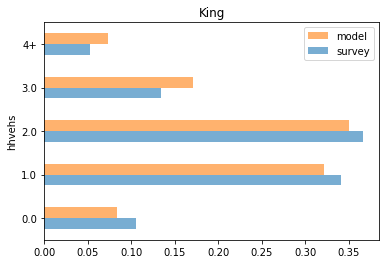

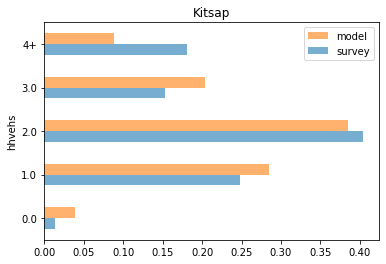

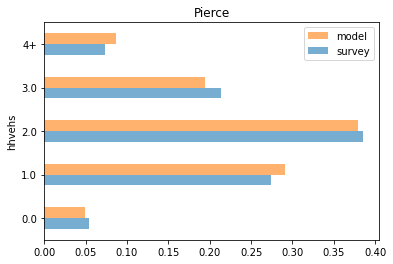

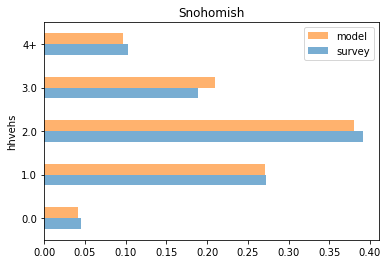

In [40]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [41]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                         
Work County      King Kitsap  Pierce Snohomish
Home County                                   
King        1,024,564    444  27,341    38,231
Kitsap         10,027 92,841   6,625        89
Pierce         95,111  6,337 245,315       375
Snohomish     159,281    105     321   213,677